In [15]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [26]:
data = pd.read_csv("./data/data.csv")
genre_data = pd.read_csv('./data/data_by_genres.csv')
year_data = pd.read_csv('./data/data_by_year.csv')

In [27]:
print(data.head())

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

In [28]:
print(data.tail())

        valence  year  acousticness  \
170648    0.608  2020       0.08460   
170649    0.734  2020       0.20600   
170650    0.637  2020       0.10100   
170651    0.195  2020       0.00998   
170652    0.642  2020       0.13200   

                                                  artists  danceability  \
170648  ['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...         0.786   
170649                                       ['Ashnikko']         0.717   
170650                                        ['MAMAMOO']         0.634   
170651                                         ['Eminem']         0.671   
170652                              ['KEVVO', 'J Balvin']         0.856   

        duration_ms  energy  explicit                      id  \
170648       301714   0.808         0  0KkIkfsLEJbrcIhYsCL7L5   
170649       150654   0.753         0  0OStKKAuXlxA0fMH54Qs6E   
170650       211280   0.858         0  4BZXVFYCb76Q0Klojq4piV   
170651       337147   0.623         1  5SiZJoLXp3WOl3J

In [19]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None


In [30]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB
None


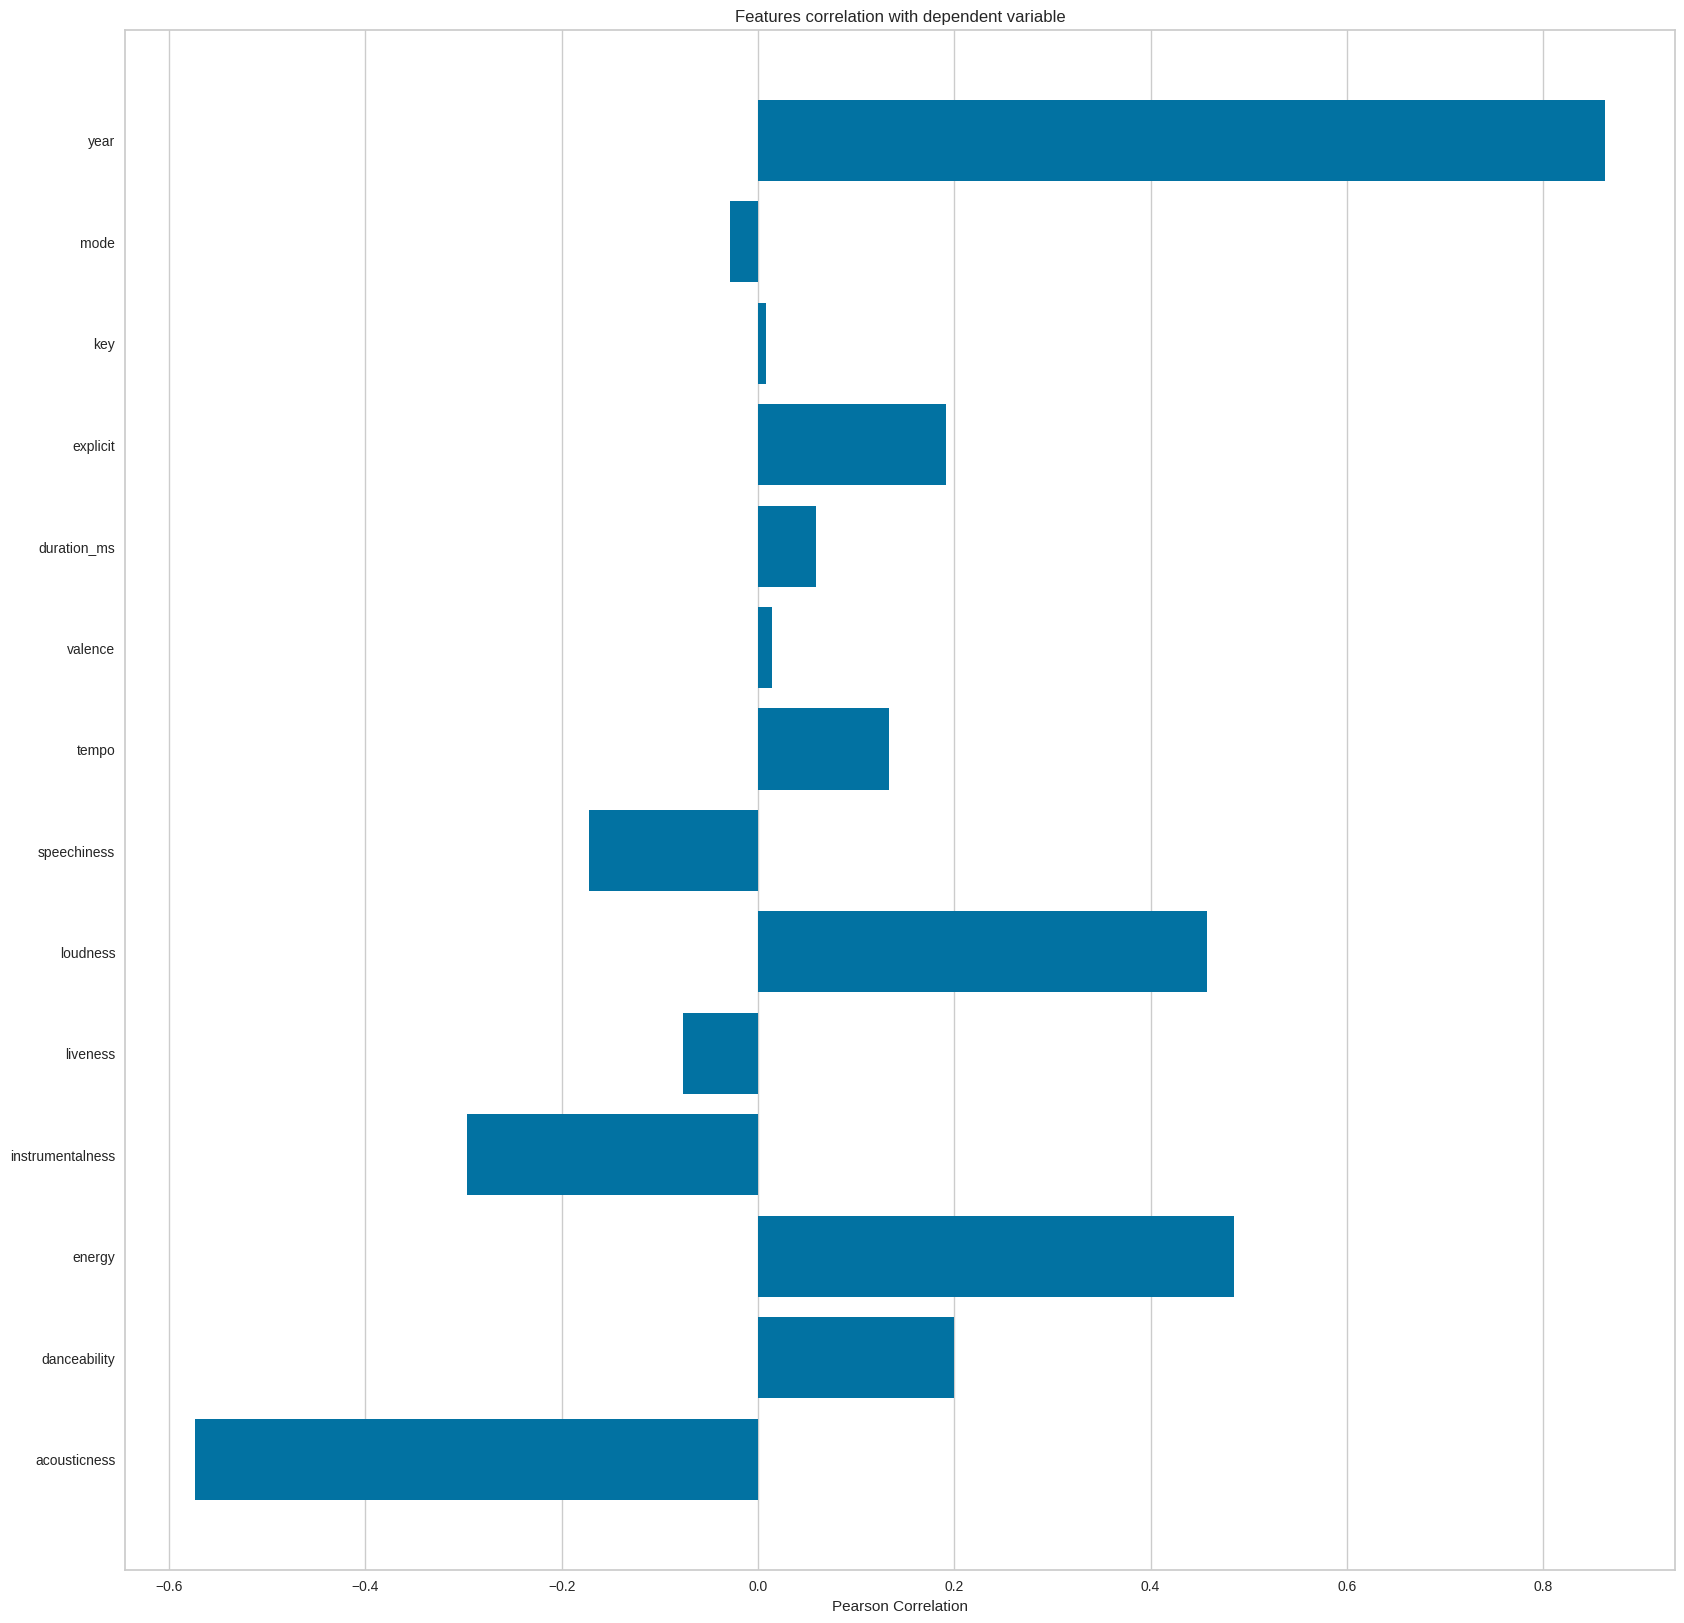

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [32]:

from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

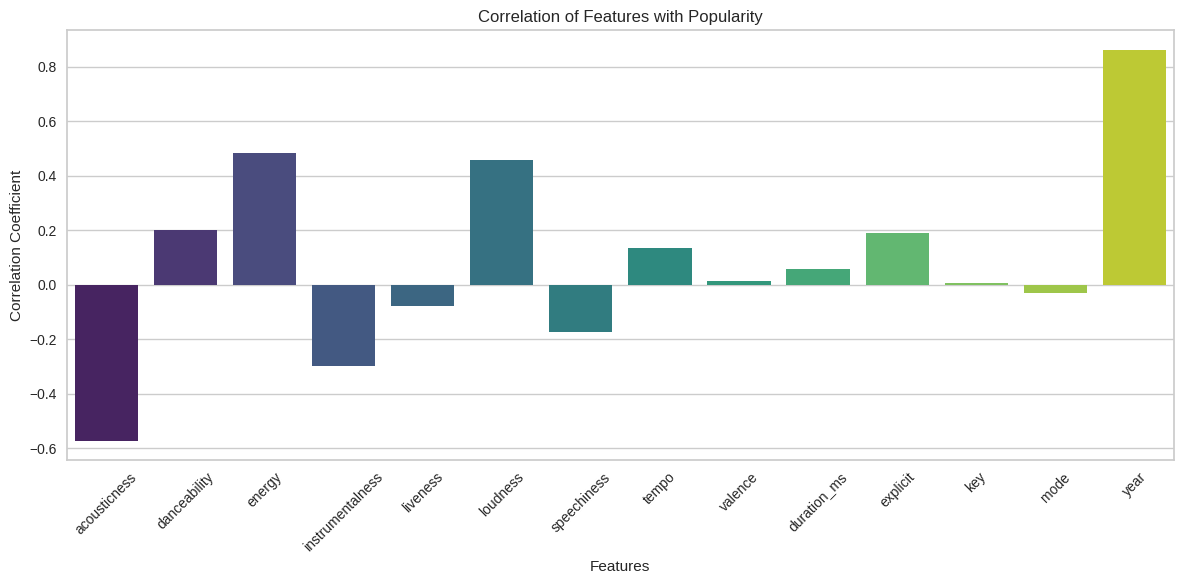

In [33]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
                 'duration_ms','explicit','key','mode','year']
X, y = data[feature_names], data['popularity']

# Compute the correlation of each feature with the target
correlations = X.corrwith(y)

# Create a bar plot for the correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Correlation of Features with Popularity")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

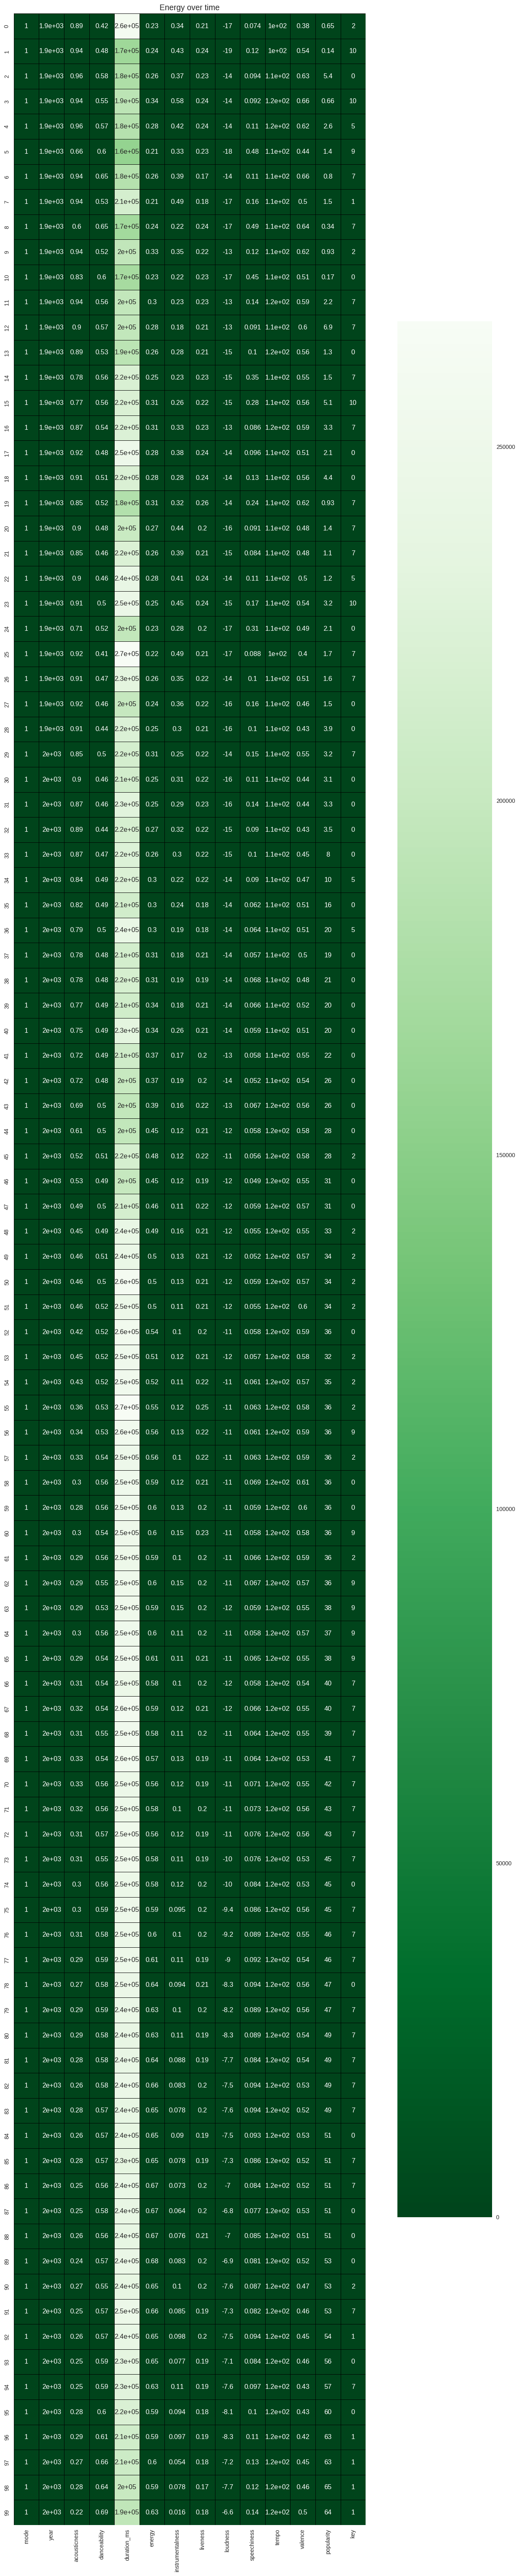

In [35]:
pivot_table = year_data.pivot_table(
    index='year', 
    columns='duration_ms', 
    values='energy', 
    aggfunc='mean'
)


# Plotting the heatmap using the pivoted table
plt.figure(figsize=(20, 80))  # Adjust figure size as needed
plt.xlabel('year', size = 14)
plt.ylabel('duration_ms', size = 14)
plt.title('Energy over time', size = 14)
sns.heatmap(year_data, annot=True, linewidths=.4,linecolor='black', square=True, cmap='Greens_r',cbar=True);

